In [74]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [26]:
dataset = pd.read_excel("E:\LetsUpgrade-AI-ML\Assignments\Day 21 - Linear-Logistics Regression\Linear Regression.xlsx")

In [27]:
dataset.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [28]:
dataset.shape

(21613, 5)

In [29]:
dataset.isnull().any()

price          False
sqft_living    False
bedrooms       False
bathrooms      False
floors         False
dtype: bool

In [30]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141905,367127.195968,75000.0,321950.00,450000.00,645000.0,7700000.0
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
floors,21613.0,1.494309,0.539989,1.0,1.00,1.50,2.0,3.5


In [47]:
dataset.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


# Iteration 1: Sq Ft vs Price

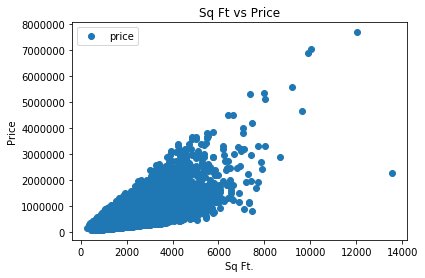

In [55]:
dataset.plot(x='sqft_living', y='price', style='o')  
plt.title('Sq Ft vs Price')  
plt.xlabel('Sq Ft.')  
plt.ylabel('Price')  
plt.show()

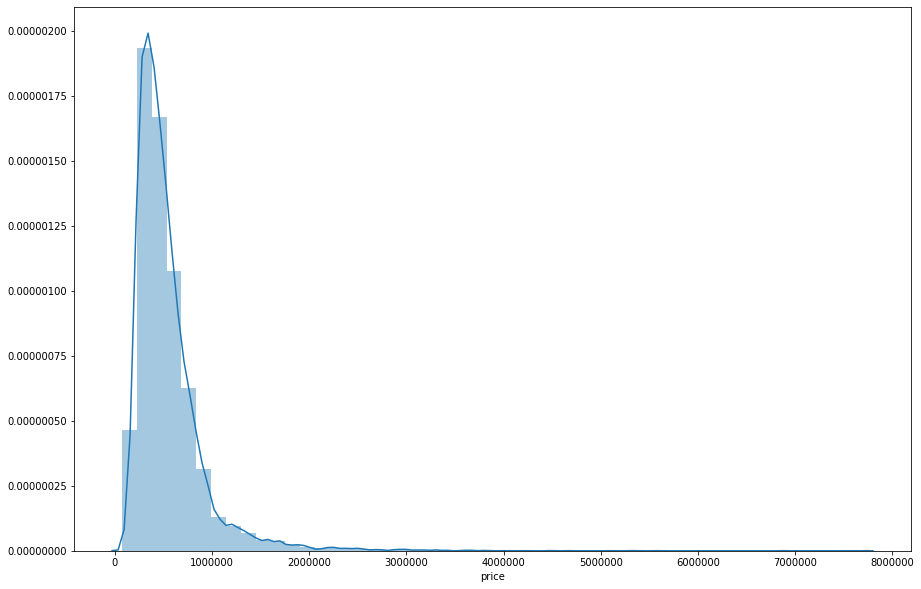

In [49]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['price'])

In [50]:
X = dataset['sqft_living'].values.reshape(-1,1)
y = dataset['price'].values.reshape(-1,1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[-48257.06345556]
[[283.96855737]]


### This means that for every square foot increase, there is a 283 USD increase in price

In [37]:
y_pred = regressor.predict(X_test)

In [38]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,297000,3.578180e+05
1,1578000,1.277876e+06
2,562100,3.606577e+05
3,631500,2.726274e+05
4,780000,8.547629e+05
...,...,...
4318,844000,8.292058e+05
4319,335500,3.095433e+05
4320,369950,3.379402e+05
4321,300000,2.215131e+05


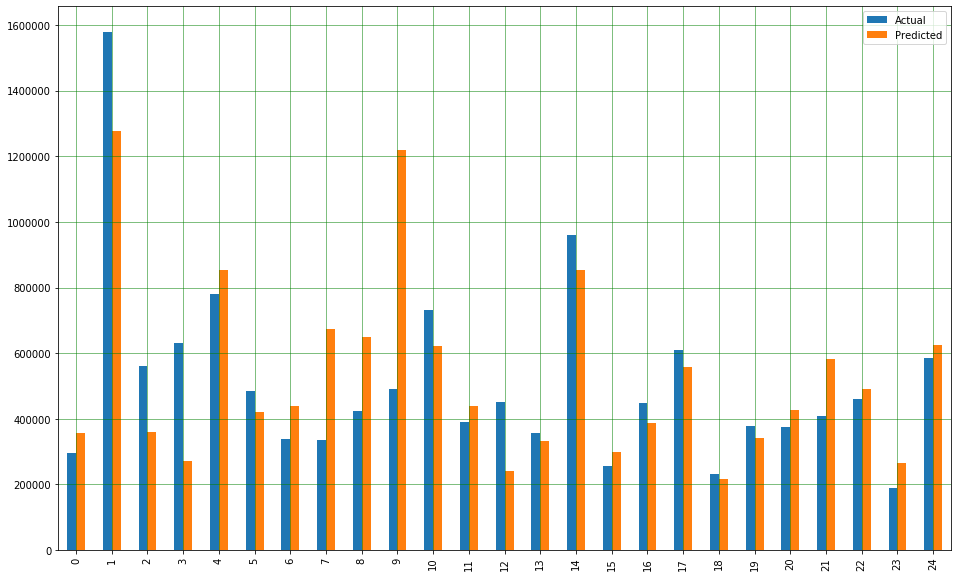

In [39]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

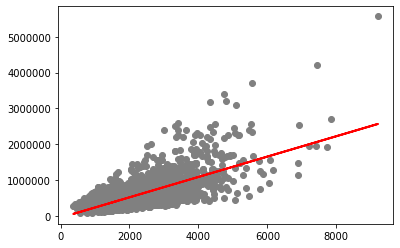

In [43]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [51]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 :', metrics.r2_score(y_test,y_pred))


Mean Absolute Error: 170780.9266208464
Mean Squared Error: 61940787221.498245
Root Mean Squared Error: 248879.06143647007
R2 : 0.47915770799654933


### RMSE is more than 10% of the mean value of the price which is 540088.141905, hence the model is not accurate at all

### Also the R2 value is 47.91% which is very low accuracy

# ---------------------------------------------------------------------------------------------------------
# Iteration 2: bedrooms vs Price

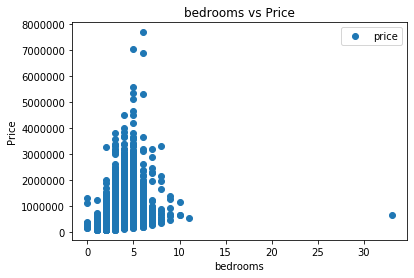

In [57]:
dataset.plot(x='bedrooms', y='price', style='o')  
plt.title('bedrooms vs Price')  
plt.xlabel('bedrooms')  
plt.ylabel('Price')  
plt.show()

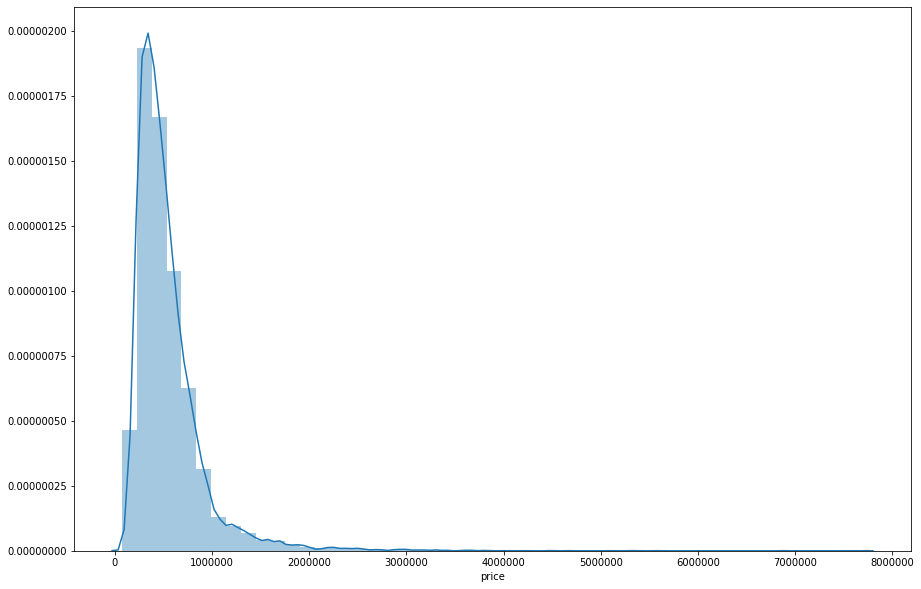

In [58]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['price'])

In [59]:
X = dataset['bedrooms'].values.reshape(-1,1)
y = dataset['price'].values.reshape(-1,1)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [61]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[126751.84604781]
[[123535.45915908]]


### This means that for every additional bedroom increase, there is a 123535.46 USD increase in price

In [63]:
y_pred = regressor.predict(X_test)


In [64]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,297000,373822.764366
1,1578000,620893.682684
2,562100,373822.764366
3,631500,373822.764366
4,780000,620893.682684
...,...,...
4318,844000,620893.682684
4319,335500,497358.223525
4320,369950,497358.223525
4321,300000,497358.223525


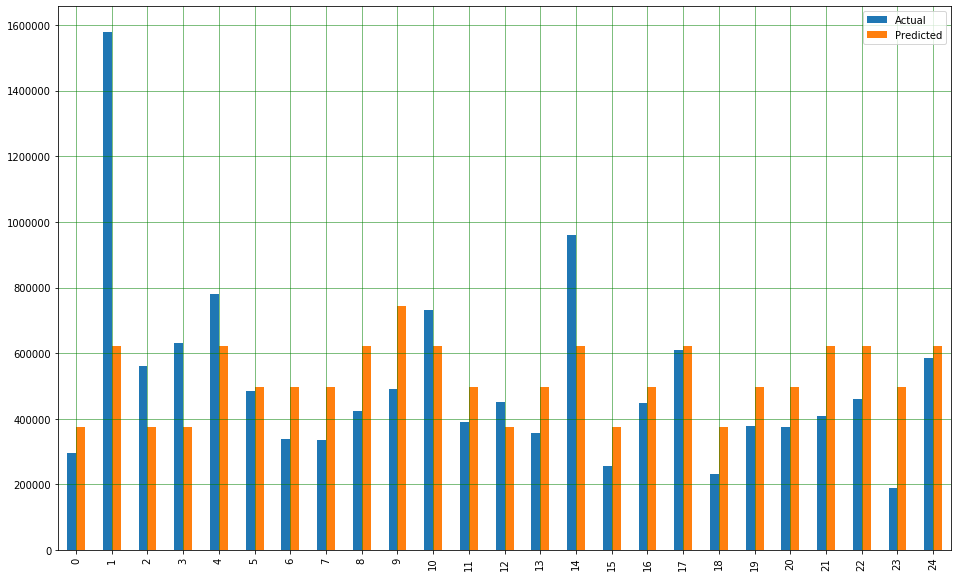

In [65]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


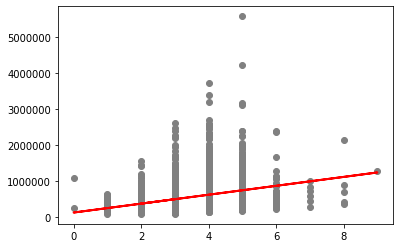

In [66]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [67]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 :', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 220904.681532415
Mean Squared Error: 109355907762.4588
Root Mean Squared Error: 330690.0478733202
R2 : 0.08045757572566936


### RMSE is more than 10% of the mean value of the price which is 540088.141905, hence the model is not accurate at all

### Also the R2 value is 8.04% which is very low accuracy

# Iteration 3: Multiple Linear Regression

In [82]:
X = dataset[['sqft_living','bedrooms','bathrooms','floors']].values
y = dataset['price'].values


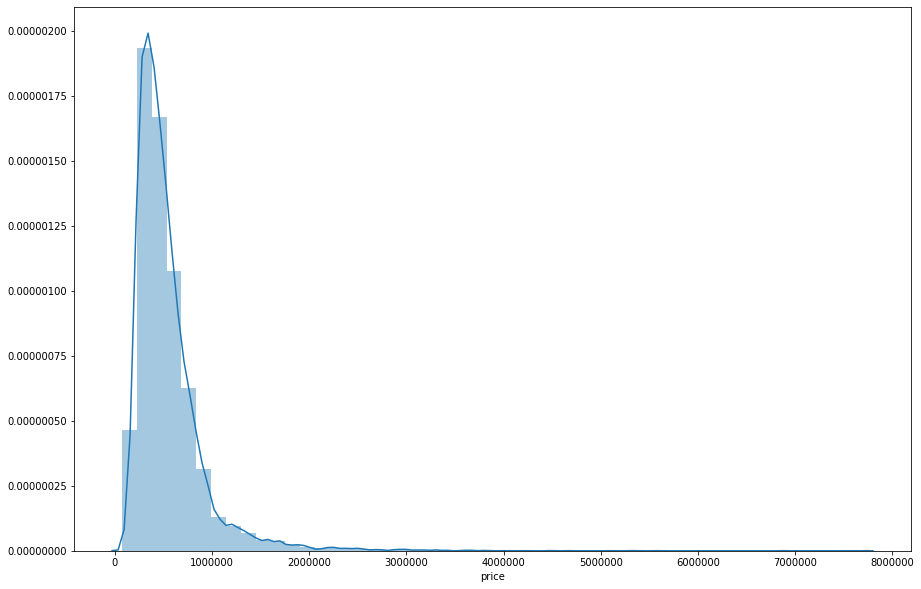

In [83]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['price'])

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [85]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

65340.25132310449
[   313.19378504 -56600.74916997   5910.55508513   2453.13646507]


In [96]:
y_pred = regressor.predict(X_test)


In [97]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,297000,4.162311e+05
1,1578000,1.325668e+06
2,562100,4.100239e+05
3,631500,3.144114e+05
4,780000,8.545762e+05
...,...,...
4318,844000,8.308216e+05
4319,335500,3.029588e+05
4320,369950,3.411642e+05
4321,300000,2.026624e+05


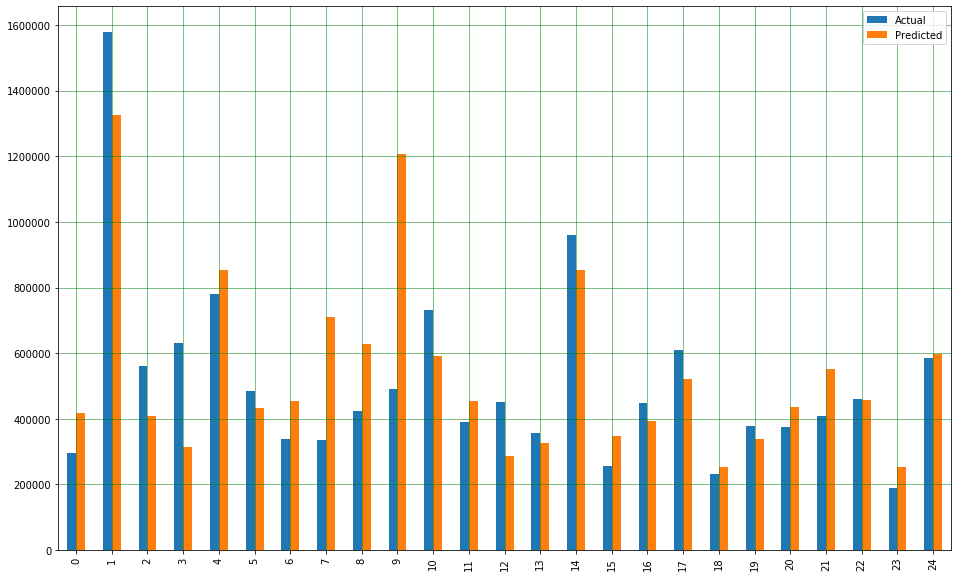

In [98]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [103]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 :', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 167280.8939127626
Mean Squared Error: 59972240621.152885
Root Mean Squared Error: 244892.3041280654
R2 : 0.49571065104477097


### RMSE is more than 10% of the mean value of the price which is 540088.141905, hence the model is not accurate at all

### Also the R2 value is 49.57% which is very low accuracy